In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [2]:
df=pd.read_csv("project9.csv")

In [3]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [5]:
df.shape

(6435, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [7]:
df.sample()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1169,9,30-07-2010,468675.19,0,79.83,2.64,214.925711,6.442


In [8]:
df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [9]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [10]:
total_week_sales=df["Weekly_Sales"].sum()

In [11]:
print("the weeksales for all stores:",total_week_sales)

the weeksales for all stores: 6737218987.11


In [12]:
avg_week_sales=df.groupby(["Store"])["Weekly_Sales"].mean()

In [13]:
print("the average of each stores weekly_sales:")
avg_week_sales

the average of each stores weekly_sales:


Store
1     1.555264e+06
2     1.925751e+06
3     4.027044e+05
4     2.094713e+06
5     3.180118e+05
6     1.564728e+06
7     5.706173e+05
8     9.087495e+05
9     5.439806e+05
10    1.899425e+06
11    1.356383e+06
12    1.009002e+06
13    2.003620e+06
14    2.020978e+06
15    6.233125e+05
16    5.192477e+05
17    8.935814e+05
18    1.084718e+06
19    1.444999e+06
20    2.107677e+06
21    7.560691e+05
22    1.028501e+06
23    1.389864e+06
24    1.356755e+06
25    7.067215e+05
26    1.002912e+06
27    1.775216e+06
28    1.323522e+06
29    5.394514e+05
30    4.385796e+05
31    1.395901e+06
32    1.166568e+06
33    2.598617e+05
34    9.667816e+05
35    9.197250e+05
36    3.735120e+05
37    5.189003e+05
38    3.857317e+05
39    1.450668e+06
40    9.641280e+05
41    1.268125e+06
42    5.564039e+05
43    6.333247e+05
44    3.027489e+05
45    7.859814e+05
Name: Weekly_Sales, dtype: float64

In [14]:
max=df.groupby(["Store"])["Weekly_Sales"].max()

In [15]:
print("max:",max)

max: Store
1     2387950.20
2     3436007.68
3      605990.41
4     3676388.98
5      507900.07
6     2727575.18
7     1059715.27
8     1511641.09
9      905324.68
10    3749057.69
11    2306265.36
12    1768249.89
13    3595903.20
14    3818686.45
15    1368318.17
16    1004730.69
17    1309226.79
18    2027507.15
19    2678206.42
20    3766687.43
21    1587257.78
22    1962445.04
23    2734277.10
24    2386015.75
25    1295391.19
26    1573982.47
27    3078162.08
28    2026026.39
29    1130926.79
30     519354.88
31    2068942.97
32    1959526.96
33     331173.51
34    1620748.25
35    1781866.98
36     489372.02
37     605791.46
38     499267.66
39    2554482.84
40    1648829.18
41    2263722.68
42     674919.45
43     725043.04
44     376233.89
45    1682862.03
Name: Weekly_Sales, dtype: float64


In [16]:
sum=df.groupby("Store")["Weekly_Sales"].sum().head()

In [17]:
print("sum of total week_sales top 5:",sum)

sum of total week_sales top 5: Store
1    2.224028e+08
2    2.753824e+08
3    5.758674e+07
4    2.995440e+08
5    4.547569e+07
Name: Weekly_Sales, dtype: float64


In [18]:
max_sales=df.groupby(["Store"])["Weekly_Sales"].sum().idxmax()

In [19]:
print("the highest of weekly_sales:",max_sales)

the highest of weekly_sales: 20


In [20]:
min=df.groupby(["Store"])["Weekly_Sales"].min()

In [21]:
print(min.head())

Store
1    1316899.31
2    1650394.44
3     339597.38
4    1762539.30
5     260636.71
Name: Weekly_Sales, dtype: float64


In [22]:
sum=df.groupby("Store")["Weekly_Sales"].sum()

In [23]:
print(sum)

Store
1     2.224028e+08
2     2.753824e+08
3     5.758674e+07
4     2.995440e+08
5     4.547569e+07
6     2.237561e+08
7     8.159828e+07
8     1.299512e+08
9     7.778922e+07
10    2.716177e+08
11    1.939628e+08
12    1.442872e+08
13    2.865177e+08
14    2.889999e+08
15    8.913368e+07
16    7.425243e+07
17    1.277821e+08
18    1.551147e+08
19    2.066349e+08
20    3.013978e+08
21    1.081179e+08
22    1.470756e+08
23    1.987506e+08
24    1.940160e+08
25    1.010612e+08
26    1.434164e+08
27    2.538559e+08
28    1.892637e+08
29    7.714155e+07
30    6.271689e+07
31    1.996139e+08
32    1.668192e+08
33    3.716022e+07
34    1.382498e+08
35    1.315207e+08
36    5.341221e+07
37    7.420274e+07
38    5.515963e+07
39    2.074455e+08
40    1.378703e+08
41    1.813419e+08
42    7.956575e+07
43    9.056544e+07
44    4.329309e+07
45    1.123953e+08
Name: Weekly_Sales, dtype: float64


In [24]:
min_week_sales=df.groupby(["Store"])["Weekly_Sales"].sum().idxmin()

In [25]:
print("stores the lowest weekly_sales:",min_week_sales)

stores the lowest weekly_sales: 33


In [26]:
over_all=df.groupby("Store")["Weekly_Sales"].mean()

In [27]:
print("overall weeksales on each store",over_all)

overall weeksales on each store Store
1     1.555264e+06
2     1.925751e+06
3     4.027044e+05
4     2.094713e+06
5     3.180118e+05
6     1.564728e+06
7     5.706173e+05
8     9.087495e+05
9     5.439806e+05
10    1.899425e+06
11    1.356383e+06
12    1.009002e+06
13    2.003620e+06
14    2.020978e+06
15    6.233125e+05
16    5.192477e+05
17    8.935814e+05
18    1.084718e+06
19    1.444999e+06
20    2.107677e+06
21    7.560691e+05
22    1.028501e+06
23    1.389864e+06
24    1.356755e+06
25    7.067215e+05
26    1.002912e+06
27    1.775216e+06
28    1.323522e+06
29    5.394514e+05
30    4.385796e+05
31    1.395901e+06
32    1.166568e+06
33    2.598617e+05
34    9.667816e+05
35    9.197250e+05
36    3.735120e+05
37    5.189003e+05
38    3.857317e+05
39    1.450668e+06
40    9.641280e+05
41    1.268125e+06
42    5.564039e+05
43    6.333247e+05
44    3.027489e+05
45    7.859814e+05
Name: Weekly_Sales, dtype: float64


In [28]:
median=df["Weekly_Sales"].median()

In [29]:
print("median of all week_sales:",median)

median of all week_sales: 960746.04


In [30]:
std=df["Weekly_Sales"].std()
print("std of week_sales:",std)

std of week_sales: 564366.6220536975


In [31]:
min=df["Weekly_Sales"].min()
print("min of week_sales:",min)

min of week_sales: 209986.25


In [32]:
max=df["Weekly_Sales"].max()
print("max of week_sales:",max)

max of week_sales: 3818686.45


In [33]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [34]:
df.Holiday_Flag.value_counts()

Holiday_Flag
0    5985
1     450
Name: count, dtype: int64

In [35]:
num_holiday_weeks=df[df["Holiday_Flag"]==1]["Holiday_Flag"].sum()

In [36]:
num_holiday_weeks

450

In [37]:
print("no of holiday_weekly_Sales:",num_holiday_weeks)

no of holiday_weekly_Sales: 450


In [38]:
holiday_sales=df[df["Holiday_Flag"]==1]["Weekly_Sales"].sum()

In [39]:
print("the weekly sales during holidays:",holiday_sales)

the weekly sales during holidays: 505299551.56


In [40]:
avg_holiday_sales=df[df["Holiday_Flag"]==1]["Weekly_Sales"].mean()

In [41]:
print("the avg weekly sales during holidays:",avg_holiday_sales)

the avg weekly sales during holidays: 1122887.8923555557


In [42]:
non_holiday_Sales=df[df["Holiday_Flag"]==0]["Weekly_Sales"].sum()

In [43]:
print("the weekly sales during non_holiday_Sales:",non_holiday_Sales)

the weekly sales during non_holiday_Sales: 6231919435.55


In [44]:
avg_non_holiday_Sales=df[df["Holiday_Flag"]==0]["Weekly_Sales"].mean()

In [45]:
print("the avg weekly sales during non_holiday_Sales:",avg_non_holiday_Sales)

the avg weekly sales during non_holiday_Sales: 1041256.3802088555


In [46]:
corr_sales_temp=df["Weekly_Sales"].corr(df["Temperature"])

In [47]:
print("the corr between weekly_sales and temperature:",corr_sales_temp)

the corr between weekly_sales and temperature: -0.06381001317946956


In [48]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [49]:
corr_sales_fuel=df["Weekly_Sales"].corr(df["Fuel_Price"])

In [50]:
print("the correlation between sales and fuel:",corr_sales_fuel)

the correlation between sales and fuel: 0.009463786314475142


In [51]:
corr_sales_cpi=df["Weekly_Sales"].corr(df["CPI"])

In [52]:
print("the correlation between sales and cpl:",corr_sales_cpi)

the correlation between sales and cpl: -0.07263416204017628


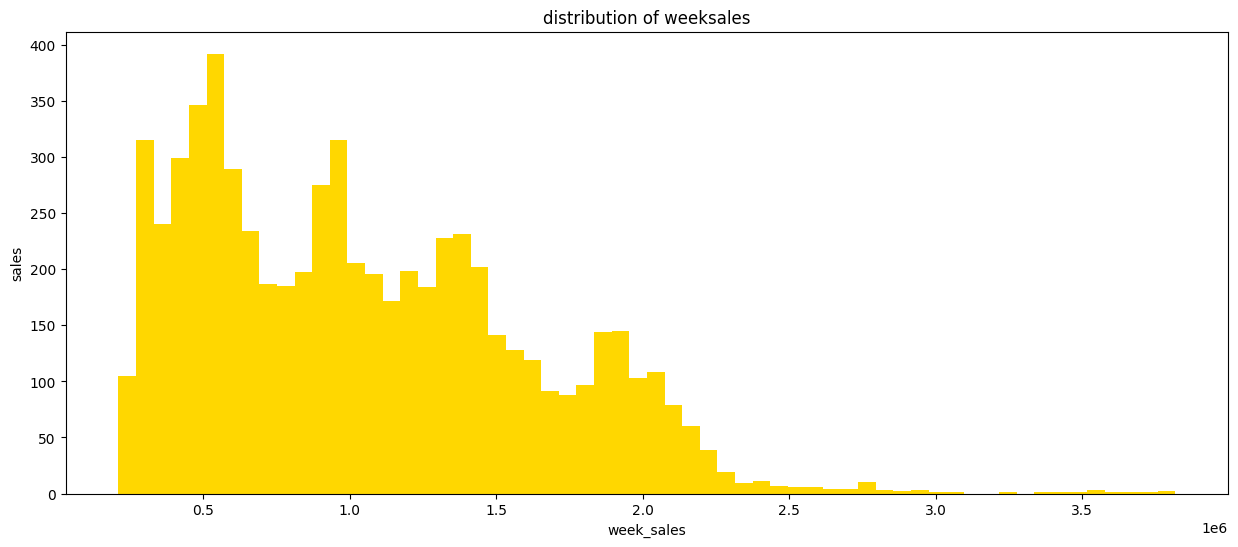

In [53]:
plt.figure(figsize=(15,6))
plt.hist(df["Weekly_Sales"],bins=60,color="gold")
plt.title("distribution of weeksales")
plt.xlabel("week_sales")
plt.ylabel("sales")
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_8768\2113620310.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Weekly_Sales"],bins=50,color="skyblue")


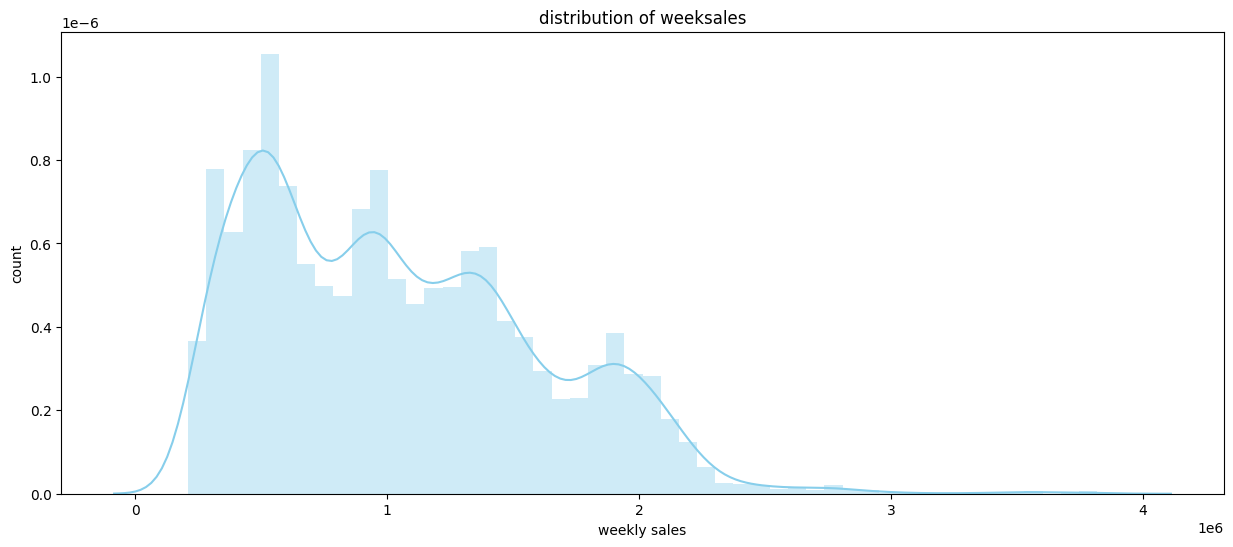

In [54]:
plt.figure(figsize=(15,6))
sns.distplot(df["Weekly_Sales"],bins=50,color="skyblue")
plt.title("distribution of weeksales")
plt.xlabel("weekly sales")
plt.ylabel("count")
plt.show()

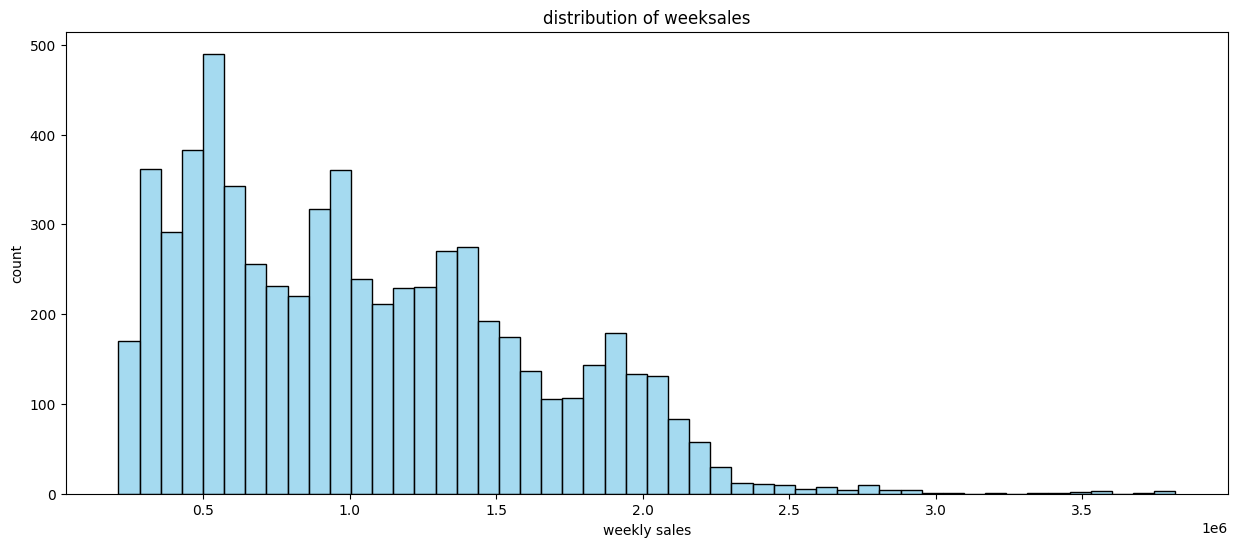

In [55]:
plt.figure(figsize=(15,6))
sns.histplot(df["Weekly_Sales"],bins=50,color="skyblue")
plt.title("distribution of weeksales")
plt.xlabel("weekly sales")
plt.ylabel("count")
plt.show()

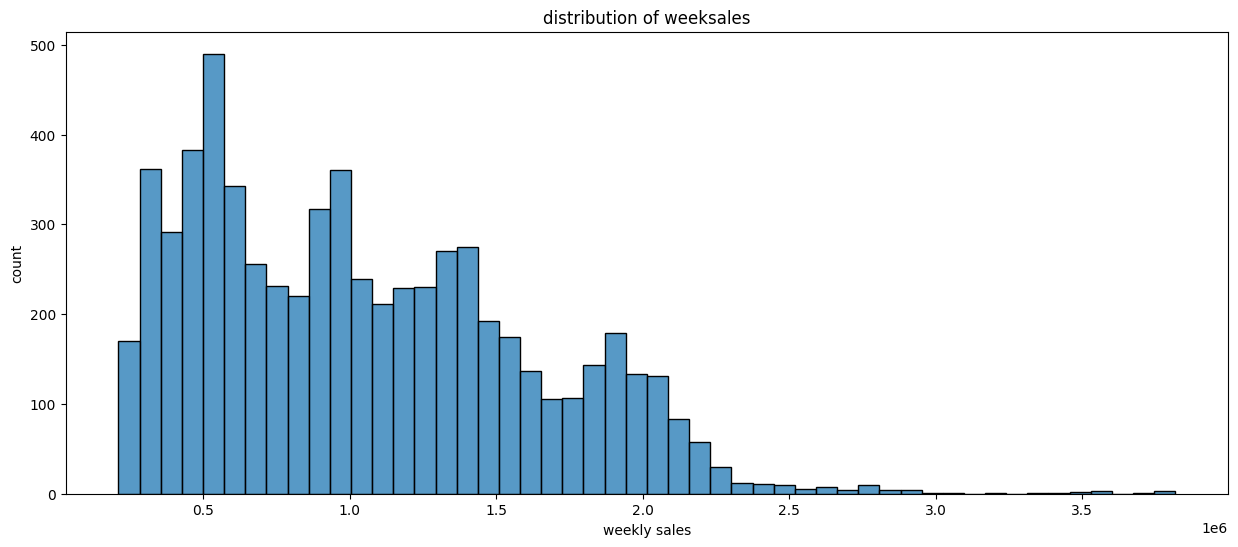

In [56]:
plt.figure(figsize=(15,6))
sns.histplot(df["Weekly_Sales"],bins=50)
plt.title("distribution of weeksales")
plt.xlabel("weekly sales")
plt.ylabel("count")
plt.show()

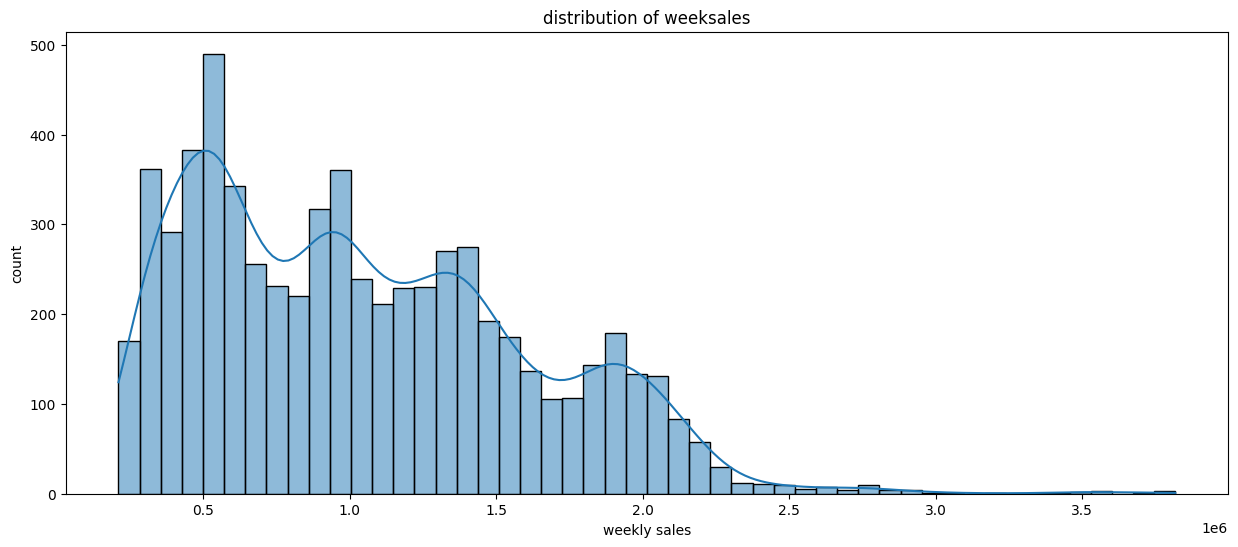

In [57]:
plt.figure(figsize=(15,6))
sns.histplot(df["Weekly_Sales"],bins=50,kde=True)
plt.title("distribution of weeksales")
plt.xlabel("weekly sales")
plt.ylabel("count")
plt.show()

In [58]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


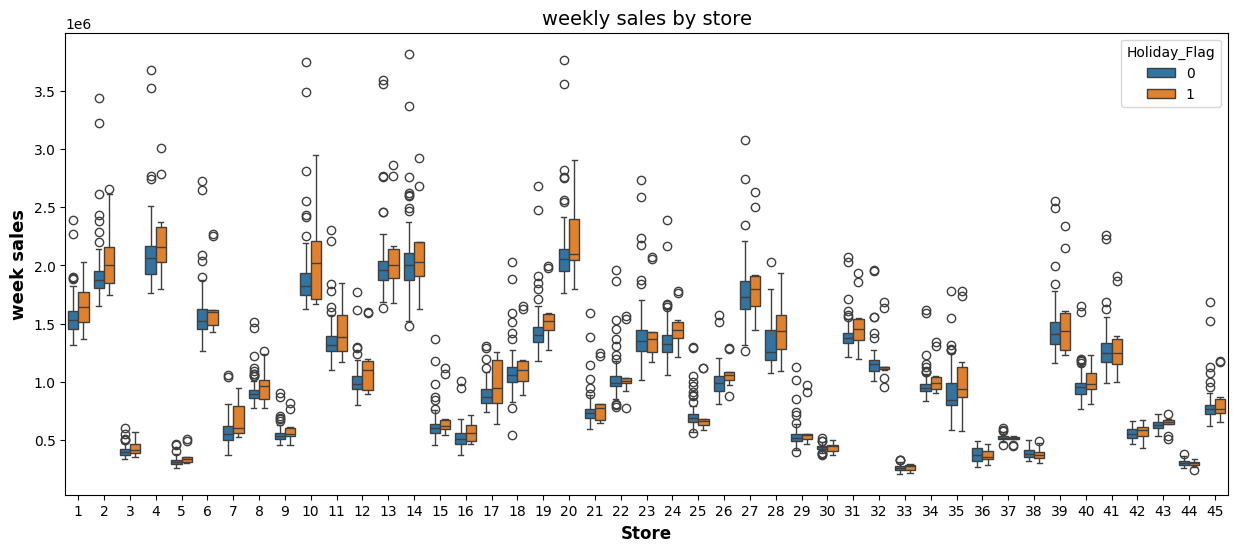

In [59]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df,x="Store",y="Weekly_Sales",hue="Holiday_Flag")
plt.xlabel("Store",fontsize=12,weight="bold")
plt.ylabel("week sales",fontsize=13,weight="bold")
plt.title("weekly sales by store",fontsize=14)
plt.show()

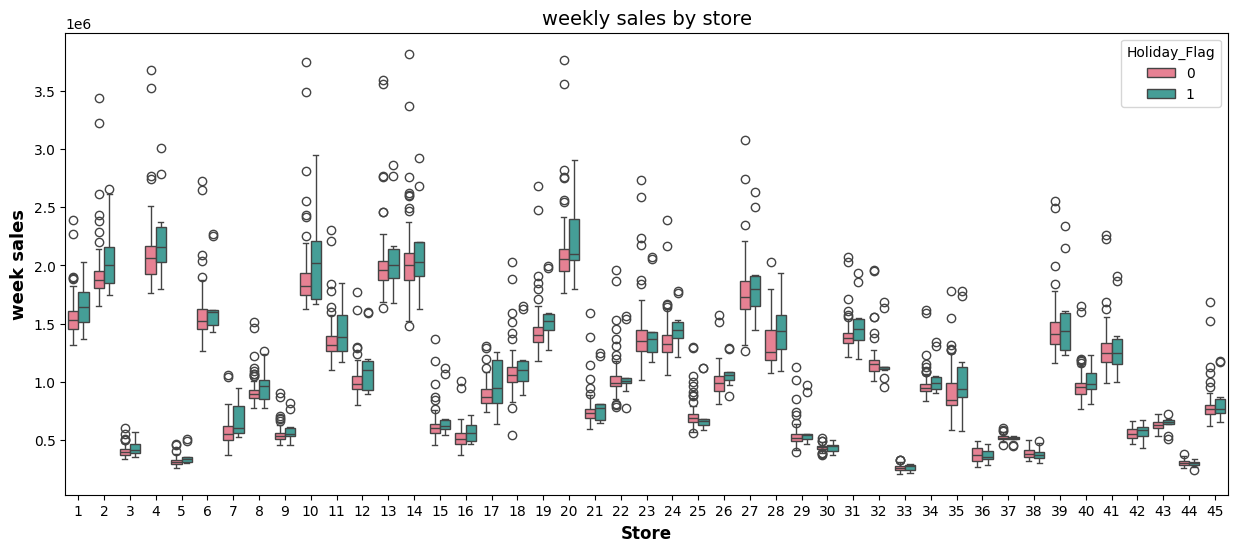

In [60]:
plt.figure(figsize=(15,6))
a=sns.boxplot(data=df,x="Store",y="Weekly_Sales",palette="husl",hue="Holiday_Flag")
plt.xlabel("Store",fontsize=12,weight="bold")
plt.ylabel("week sales",fontsize=13,weight="bold")
plt.title("weekly sales by store",fontsize=14)
plt.show()

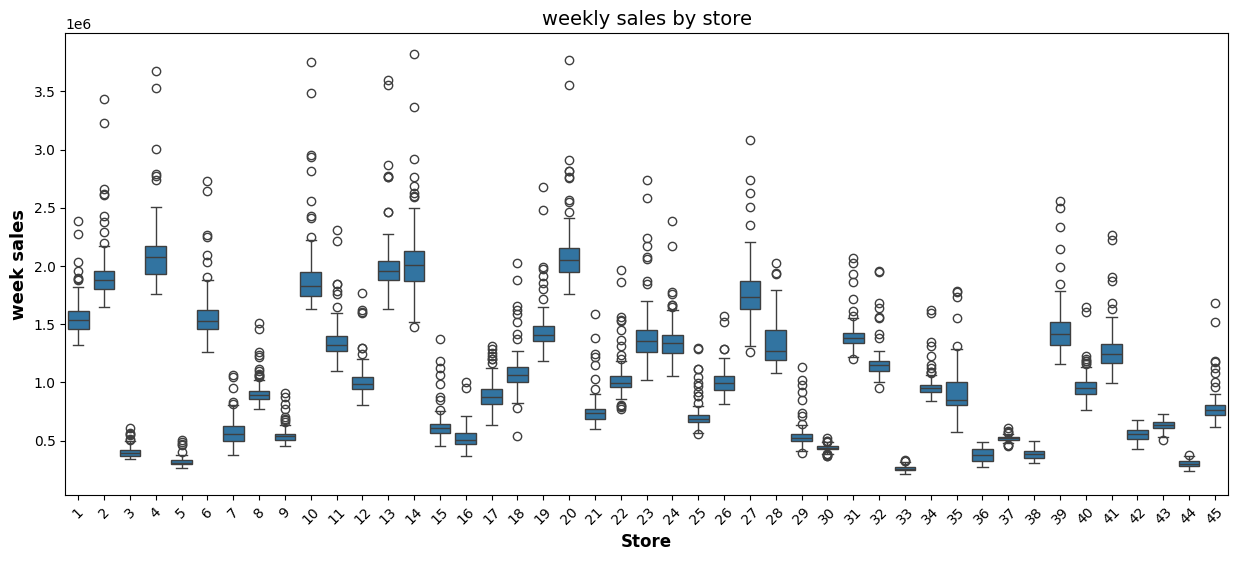

In [61]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df,x="Store",y="Weekly_Sales")
plt.xlabel("Store",fontsize=12,weight="bold")
plt.ylabel("week sales",fontsize=13,weight="bold")
plt.xticks(rotation=45)
plt.title("weekly sales by store",fontsize=14)
plt.show()

In [62]:
df.sample()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
5436,39,19-02-2010,1230591.97,0,43.96,2.514,210.045102,8.554


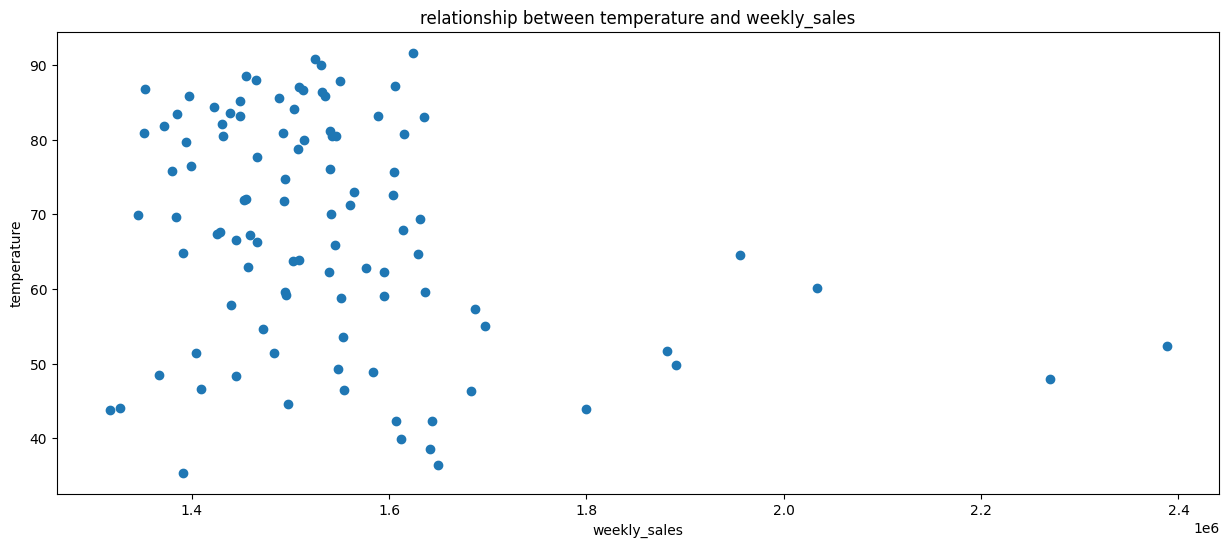

In [63]:
plt.figure(figsize=(15,6))
plt.scatter(df["Weekly_Sales"].head(100),df["Temperature"].head(100))
plt.title("relationship between temperature and weekly_sales")
plt.xlabel("weekly_sales")
plt.ylabel("temperature")
plt.show()

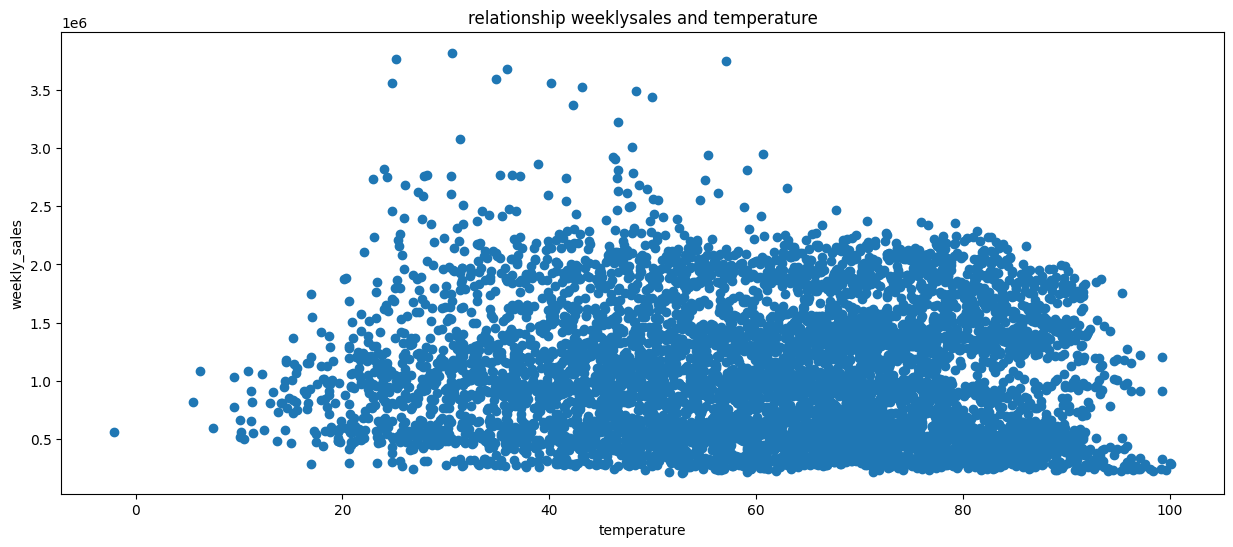

In [64]:
fig,ax=plt.subplots(figsize=(15,6))
ax.scatter(df["Temperature"],df["Weekly_Sales"])
ax.set_xlabel("temperature")
ax.set_ylabel("weekly_sales")
ax.set_title("relationship weeklysales and temperature")
plt.show()

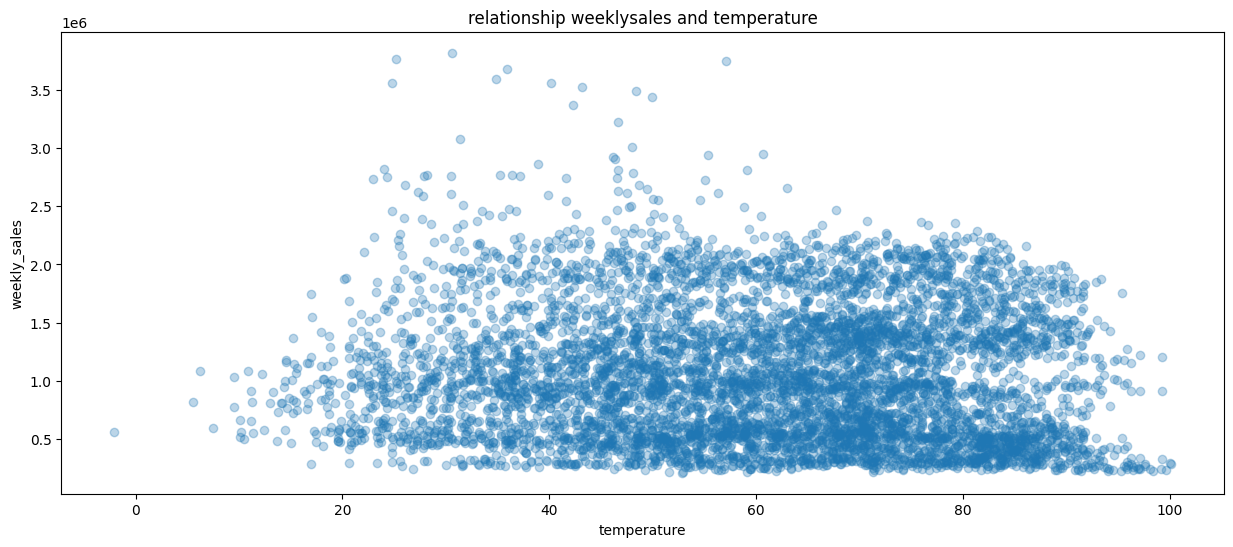

In [65]:
fig,ax=plt.subplots(figsize=(15,6))
ax.scatter(df["Temperature"],df["Weekly_Sales"],alpha=0.3)
ax.set_xlabel("temperature")
ax.set_ylabel("weekly_sales")
ax.set_title("relationship weeklysales and temperature")
plt.show()

In [66]:
coor=df[['Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].corr()

In [67]:
print(coor)

              Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price       CPI  \
Weekly_Sales      1.000000      0.036891    -0.063810    0.009464 -0.072634   
Holiday_Flag      0.036891      1.000000    -0.155091   -0.078347 -0.002162   
Temperature      -0.063810     -0.155091     1.000000    0.144982  0.176888   
Fuel_Price        0.009464     -0.078347     0.144982    1.000000 -0.170642   
CPI              -0.072634     -0.002162     0.176888   -0.170642  1.000000   
Unemployment     -0.106176      0.010960     0.101158   -0.034684 -0.302020   

              Unemployment  
Weekly_Sales     -0.106176  
Holiday_Flag      0.010960  
Temperature       0.101158  
Fuel_Price       -0.034684  
CPI              -0.302020  
Unemployment      1.000000  


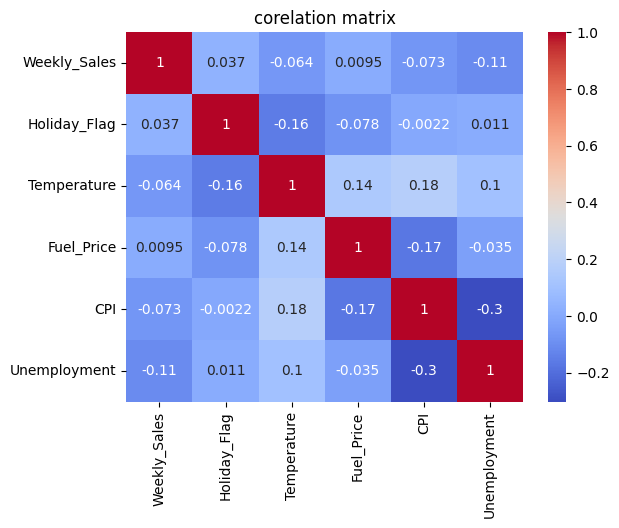

In [68]:
fig,ax=plt.subplots(figure=(15,6))
sns.heatmap(coor,annot=True,cmap="coolwarm")
ax.set_title("corelation matrix")
plt.show()

In [69]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [70]:
df["Date"]=pd.to_datetime(df["Date"],format="mixed")

In [71]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106


In [72]:
df.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

In [73]:
s=df.groupby(["Date"])["Weekly_Sales"].sum().reset_index()

In [74]:
s.head()

,Date,Weekly_Sales
0,2010-01-10,42239875.87
1,2010-02-04,50423831.26
2,2010-02-07,48917484.50
3,2010-02-19,48276993.78
4,2010-02-26,43968571.13


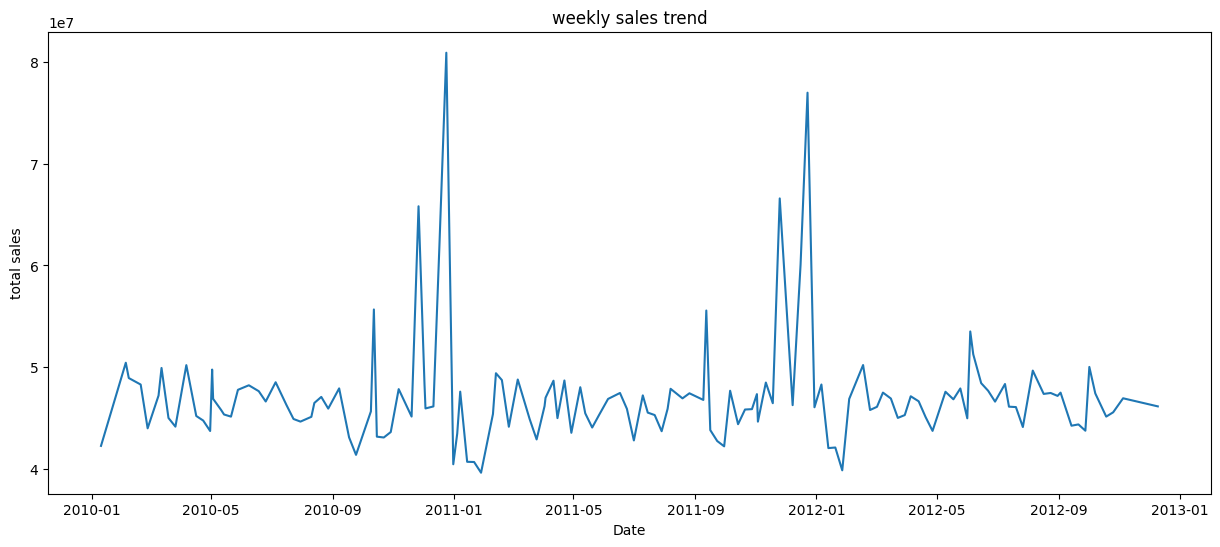

In [75]:
plt.figure(figsize=(15,6))
plt.plot(s["Date"],s["Weekly_Sales"])
plt.title("weekly sales trend")
plt.xlabel("Date")
plt.ylabel("total sales")
plt.show()

In [76]:
df.set_index("Date",inplace=True)

In [77]:
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-05-02,1,1643690.90,0,42.31,2.572,211.096358,8.106
2010-12-02,1,1641957.44,1,38.51,2.548,211.242170,8.106
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106
2010-05-03,1,1554806.68,0,46.50,2.625,211.350143,8.106


In [78]:
montly_sales=df["Weekly_Sales"].resample("M").mean()

In [79]:
montly_sales

Date
2010-01-31    9.386639e+05
2010-02-28    1.064372e+06
2010-03-31    1.034590e+06
2010-04-30    1.021177e+06
2010-05-31    1.039303e+06
2010-06-30    1.055082e+06
2010-07-31    1.023702e+06
2010-08-31    1.025212e+06
2010-09-30    9.983559e+05
2010-10-31    1.027201e+06
2010-11-30    1.176097e+06
2010-12-31    1.198413e+06
2011-01-31    9.420697e+05
2011-02-28    1.042273e+06
2011-03-31    1.011263e+06
2011-04-30    1.033220e+06
2011-05-31    1.015565e+06
2011-06-30    1.038471e+06
2011-07-31    9.976049e+05
2011-08-31    1.044895e+06
2011-09-30    1.026810e+06
2011-10-31    1.020663e+06
2011-11-30    1.126535e+06
2011-12-31    1.274311e+06
2012-01-31    9.567817e+05
2012-02-29    1.057997e+06
2012-03-31    1.025510e+06
2012-04-30    1.014127e+06
2012-05-31    1.053948e+06
2012-06-30    1.082920e+06
2012-07-31    1.025480e+06
2012-08-31    1.064514e+06
2012-09-30    9.988663e+05
2012-10-31    1.044885e+06
2012-11-30    1.042797e+06
2012-12-31    1.025078e+06
Freq: M, Name: Weekly_S

In [80]:
g=df["Weekly_Sales"].mean()

In [81]:
g

1046964.8775617715

In [82]:
yearly_sales=df["Weekly_Sales"].resample("Y").mean()

In [83]:
yearly_sales

Date
2010-12-31    1.059670e+06
2011-12-31    1.046239e+06
2012-12-31    1.033660e+06
Freq: A-DEC, Name: Weekly_Sales, dtype: float64

In [84]:
df.last("40D")

C:\Users\hp\AppData\Local\Temp\ipykernel_8768\3999884557.py:1: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  df.last("40D")


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2012-11-05,45,770487.37,0,61.24,3.889,190.976417,8.567
2012-05-18,45,800842.28,0,66.30,3.848,190.996448,8.567
2012-05-25,45,817741.17,0,67.21,3.798,191.002810,8.567
2012-01-06,45,837144.63,0,74.48,3.742,191.009171,8.567
2012-08-06,45,795133.00,0,64.30,3.689,191.015533,8.567
2012-06-15,45,821498.18,0,71.93,3.620,191.029973,8.567
2012-06-22,45,822569.16,0,74.22,3.564,191.064610,8.567
2012-06-29,45,773367.71,0,75.22,3.506,191.099246,8.567
2012-06-07,45,843361.10,0,82.99,3.475,191.133883,8.684


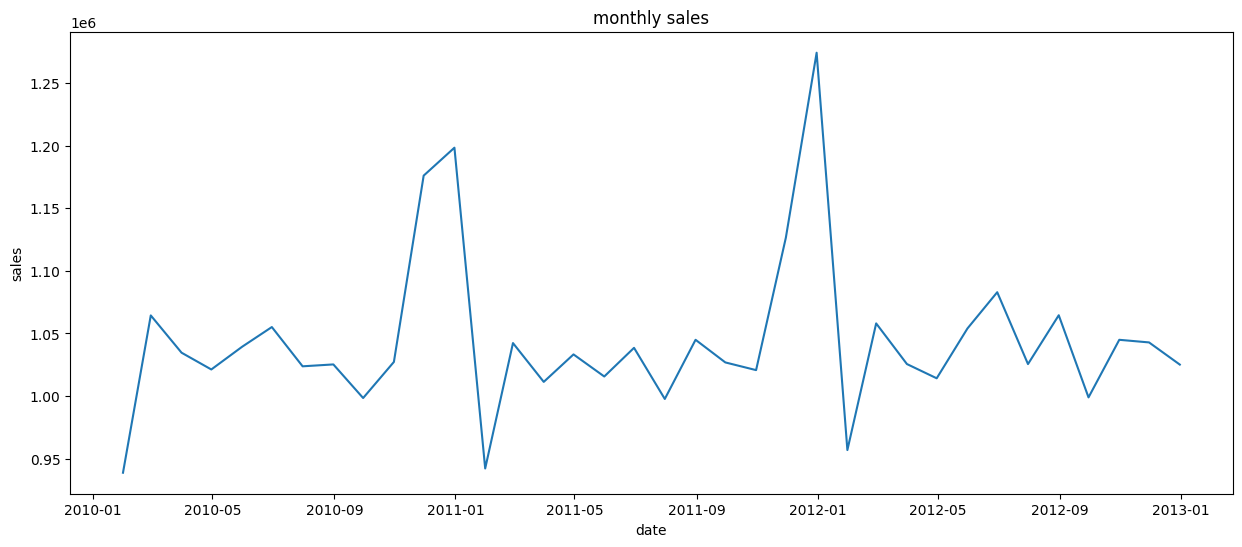

In [85]:
plt.figure(figsize=(15,6))
plt.plot(montly_sales.index,montly_sales.values)
plt.title("monthly sales")
plt.xlabel("date")
plt.ylabel("sales")
plt.show()

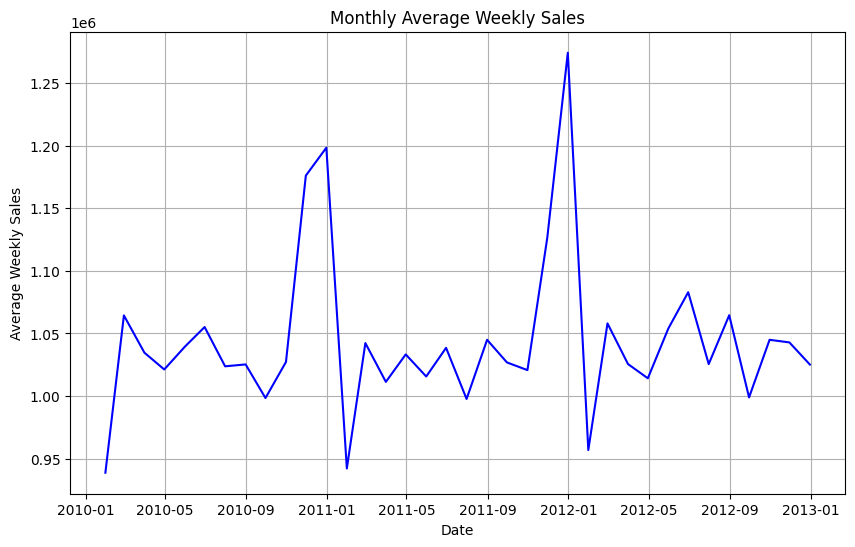

In [87]:
plt.figure(figsize=(10,6))
plt.plot(montly_sales, color='blue')
plt.xlabel("Date")
plt.ylabel("Average Weekly Sales")
plt.title("Monthly Average Weekly Sales")
plt.grid(True)
plt.show()

In [88]:
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-05-02,1,1643690.90,0,42.31,2.572,211.096358,8.106
2010-12-02,1,1641957.44,1,38.51,2.548,211.242170,8.106
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106
2010-05-03,1,1554806.68,0,46.50,2.625,211.350143,8.106


In [89]:
holiday_sales=df[df["Holiday_Flag"]==1]["Weekly_Sales"]

In [90]:
holiday_sales

Date
2010-12-02    1641957.44
2010-10-09    1507460.69
2010-11-26    1955624.11
2010-12-31    1367320.01
2011-11-02    1649614.93
                 ...    
2011-09-09     746129.56
2011-11-25    1170672.94
2011-12-30     869403.63
2012-10-02     803657.12
2012-07-09     766512.66
Name: Weekly_Sales, Length: 450, dtype: float64

In [91]:
non_holiday_Sales=df[df["Holiday_Flag"]==0]["Weekly_Sales"]

In [92]:
non_holiday_Sales

Date
2010-05-02    1643690.90
2010-02-19    1611968.17
2010-02-26    1409727.59
2010-05-03    1554806.68
2010-12-03    1439541.59
                 ...    
2012-09-28     713173.95
2012-05-10     733455.07
2012-12-10     734464.36
2012-10-19     718125.53
2012-10-26     760281.43
Name: Weekly_Sales, Length: 5985, dtype: float64

In [93]:
holiday_mean=holiday_sales.mean()

In [94]:
holiday_mean

1122887.8923555557

In [95]:
non_holiday_mean=non_holiday_Sales.mean()

In [96]:
non_holiday_mean

1041256.3802088555

In [99]:
from scipy.stats import ttest_ind

In [107]:
t_stat,t_val=ttest_ind(holiday_sales,non_holiday_Sales)


In [108]:
print(t_stat)

2.9608919093259036


In [109]:
print(t_val)

0.003078699263818616


In [110]:
print("t-statistic: {:.2f}".format(t_stat))
print("p-value: {:.4f}".format(t_val))


t-statistic: 2.96
p-value: 0.0031


In [111]:
if t_val < 0.05:
    print("There is a statistically significant difference in sales between holiday and non-holiday weeks.")
else:
    print("There is not a statistically significant difference in sales between holiday and non-holiday weeks.")

There is a statistically significant difference in sales between holiday and non-holiday weeks.
